In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
customer_data = pd.read_csv('shopping-data.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data = customer_data.iloc[:,3:5].values

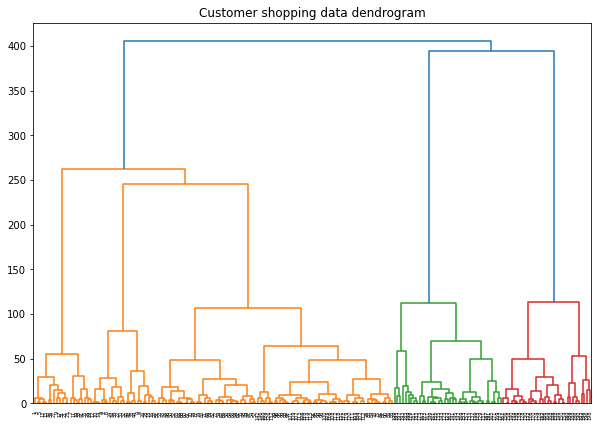

In [9]:
plt.figure(figsize=(10,7))
plt.title('Customer shopping data dendrogram')
d = dendrogram(linkage(data, method ='ward'))

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', 
                                  linkage='ward')

In [12]:
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

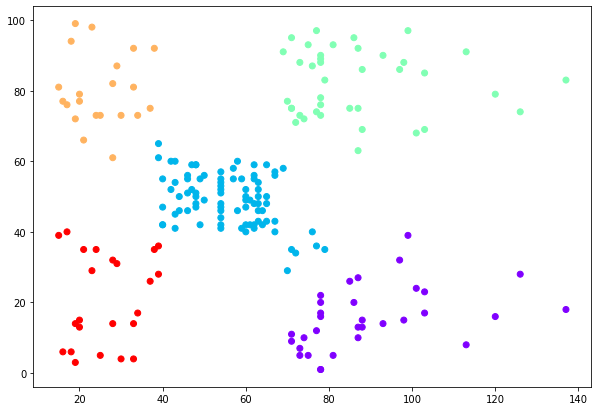

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(data[:, 0], data[:,1], c=cluster.labels_, cmap='rainbow')

### 보스턴 데이터

In [22]:
from sklearn.datasets import load_boston

In [29]:
# 데이터 불러오기
boston = load_boston()

# 데이터 프레임 - 학습하는 데이터
data = pd.DataFrame(boston.data, columns=boston.feature_names) 

# 학습하는 데이터의 정답값
target = boston.target 

data.head()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
data.shape

(506, 13)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


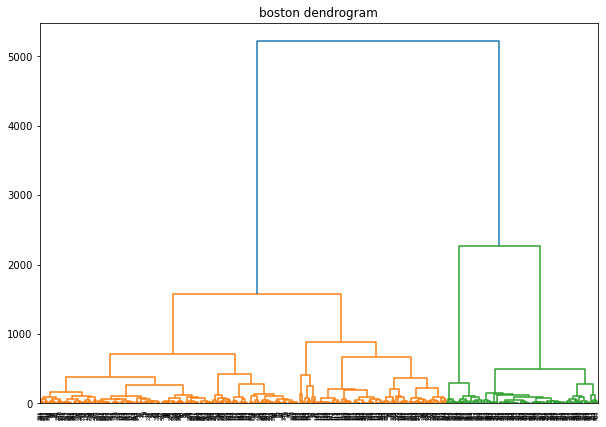

In [28]:
# 덴드로그램
# method = 'ward'
plt.figure(figsize=(10,7))
plt.title('boston dendrogram')
d = dendrogram(linkage(data, method='ward'))

C:\Users\user\AppData\Local\Temp\ipykernel_13128\4139052146.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(target[dr3['leaves']], minor=False)


[Text(0, 0.0, '17.1'),
 Text(0, 1000.0, '22.3'),
 Text(0, 2000.0, '22.0'),
 Text(0, 3000.0, '23.2'),
 Text(0, 4000.0, '24.8'),
 Text(0, 5000.0, '19.4'),
 Text(0, 6000.0, '23.7')]

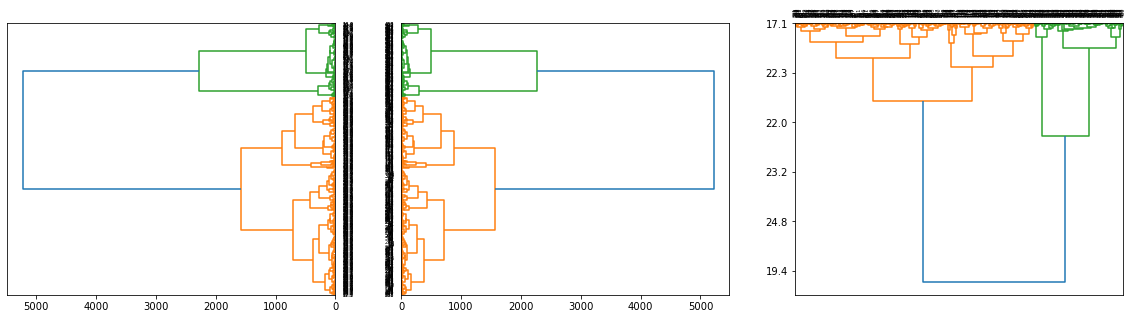

In [40]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,3,1) # 
d1 = linkage(data, method='ward')
dr1 = dendrogram(d1, orientation='left')
# dr1 = dendrogram(target[dr1['leaves']], minor=False)
ax1.set_yticklabels(target[dr1['leaves']], minor=False)

ax2 = fig.add_subplot(1,3,2) # 1행 3열, 2번 째 컬럼
d2 = linkage(data, method='ward') #ward 군집간 거리를 재는 방법
dr2 = dendrogram(d2, orientation='right') # 'bottom'

ax3 = fig.add_subplot(1,3,3)
d3 = linkage(data, method='ward')
dr3 = dendrogram(d3, orientation='bottom')
ax3.set_yticklabels(target[dr3['leaves']], minor=False)

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
# 클러스터 만들기
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', 
                                  linkage='ward')

# 학습 + 예측값
cluster.fit_predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 4, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,